<div class="alert alert-block alert-success">
    <b><center>CONVOLUTON NEURAL NETWORK</center></b>
    <b><center>MNIST 데이터로 DNN 구현해 보기</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)
rsp.fixMemoryProblem()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact

In [3]:
import tensorflow as tf
from tensorflow.keras import utils, layers, activations, models, losses, optimizers, metrics, callbacks, datasets

In [4]:
tf.__version__

1 Physical GPUs, 1 Logical GPUs


'2.4.1'

# Prepare Data

In [5]:
# Download the mnist dataset using keras
(trainDatas, trainLabels), (testDatas, testLabels) = datasets.mnist.load_data()
trainDatas.shape, trainLabels.shape, testDatas.shape, testLabels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Preprocessing Data

In [6]:
# # 2차원(28*28)이미지를 1차원 배열로 변환
trainDatas = trainDatas.reshape(-1, 28, 28, 1)
testDatas = testDatas.reshape(-1, 28, 28, 1)

# trainDatas.shape, testDatas.shape

In [7]:
# 레이블 one hot encoding
trainLabels = np.eye(10)[trainLabels]
testLabels  = np.eye(10)[testLabels]

trainLabels.shape, trainLabels.shape

((60000, 10), (60000, 10))

# Generate Model

In [8]:
model = models.Sequential([
    layers.Input([28, 28, 1]),
    layers.Conv2D(32, (3, 3), (1, 1), "valid", activation=activations.relu),
    layers.MaxPool2D((2, 2), (2, 2)),
    layers.Conv2D(32, (3, 3), (1, 1), "same", activation=activations.relu),
    layers.MaxPool2D((2, 2), (2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation=activations.relu),
    layers.Dropout(0.3),
    layers.Dense(10, activation=activations.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               295168    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

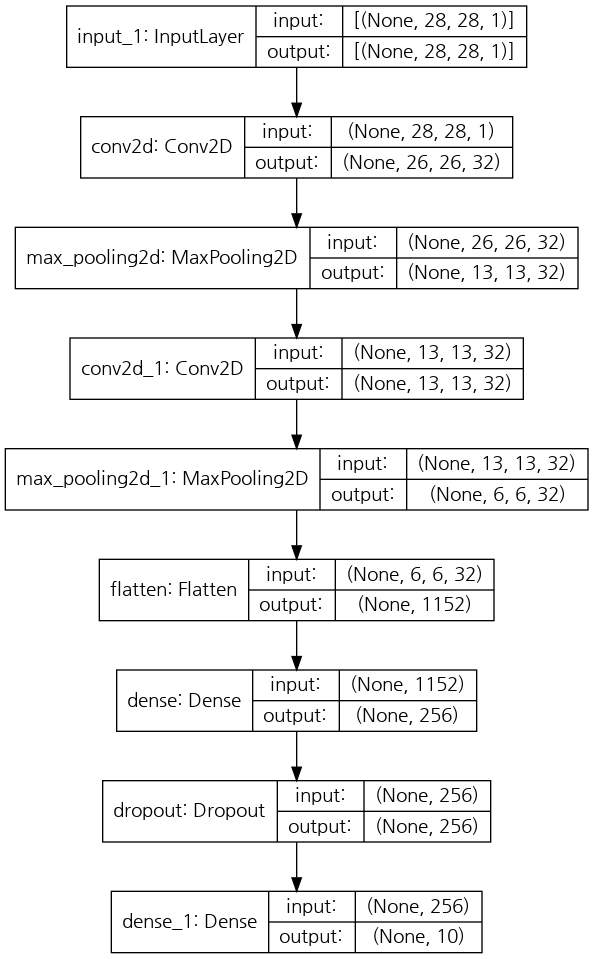

In [9]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [10]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = [metrics.CategoricalAccuracy()]
)

# Training

In [11]:
history = model.fit(
    trainDatas, trainLabels,
    batch_size=1000,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20
48/48 [==============================] - 6s 26ms/step - loss: 24.0156 - categorical_accuracy: 0.2443 - val_loss: 1.2952 - val_categorical_accuracy: 0.8116
Epoch 2/20
48/48 [==============================] - 1s 14ms/step - loss: 2.6070 - categorical_accuracy: 0.7025 - val_loss: 0.6049 - val_categorical_accuracy: 0.8903
Epoch 3/20
48/48 [==============================] - 1s 14ms/step - loss: 1.1514 - categorical_accuracy: 0.8086 - val_loss: 0.3899 - val_categorical_accuracy: 0.9152
Epoch 4/20
48/48 [==============================] - 1s 14ms/step - loss: 0.7295 - categorical_accuracy: 0.8532 - val_loss: 0.2935 - val_categorical_accuracy: 0.9277
Epoch 5/20
48/48 [==============================] - 1s 14ms/step - loss: 0.5216 - categorical_accuracy: 0.8785 - val_loss: 0.2415 - val_categorical_accuracy: 0.9377
Epoch 6/20
48/48 [==============================] - 1s 14ms/step - loss: 0.4105 - categorical_accuracy: 0.8954 - val_loss: 0.2120 - val_categorical_accuracy: 0.9436
Epoch 7/2

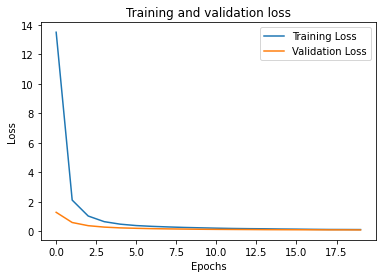

In [12]:
loss = history.history["loss"]
validationLoss = history.history["val_loss"]
epochs = range(0, len(loss))

plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, validationLoss, label="Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate

In [13]:
evaLoss, evaAcc = model.evaluate(testDatas, testLabels, verbose=0)
evaLoss, "{:3.2f} %".format(evaAcc*100)

(0.08886615931987762, '97.25 %')

# Predict

In [14]:
@interact(idx=(0, 10000, 1))
def showTestImage(idx):
    data = testDatas[idx].reshape(-1, 28, 28, 1)
    dataPred = model.predict(data.astype(float))

    plt.imshow(testDatas[idx].reshape(28,28), cmap="gray")
    plt.grid(False)
    plt.title(f"LABEL: {np.argmax(testLabels[idx])}, PREDICT: {np.argmax(dataPred)}")
    plt.show()

interactive(children=(IntSlider(value=5000, description='idx', max=10000), Output()), _dom_classes=('widget-in…

# Error Find

In [15]:
errsIdx = []
testDatas = testDatas.reshape(-1, 28, 28, 1)
dataPred = model.predict(testDatas.astype(float))

for idx in range(10000):
    if np.argmax(dataPred[idx]) != np.argmax(testLabels[idx]):
        errsIdx.append(idx)

In [16]:
errsIdx

[62,
 151,
 241,
 259,
 266,
 320,
 321,
 445,
 447,
 449,
 479,
 492,
 495,
 551,
 578,
 583,
 591,
 646,
 684,
 717,
 726,
 740,
 810,
 882,
 938,
 947,
 951,
 956,
 960,
 965,
 1003,
 1014,
 1062,
 1101,
 1107,
 1114,
 1181,
 1182,
 1226,
 1228,
 1232,
 1242,
 1247,
 1260,
 1296,
 1319,
 1356,
 1378,
 1393,
 1402,
 1522,
 1527,
 1530,
 1569,
 1611,
 1621,
 1634,
 1681,
 1694,
 1709,
 1721,
 1737,
 1740,
 1754,
 1790,
 1813,
 1868,
 1871,
 1878,
 1901,
 1903,
 1970,
 1982,
 2001,
 2016,
 2018,
 2043,
 2053,
 2070,
 2098,
 2109,
 2130,
 2135,
 2168,
 2182,
 2185,
 2189,
 2224,
 2272,
 2293,
 2325,
 2369,
 2387,
 2414,
 2422,
 2426,
 2433,
 2437,
 2462,
 2560,
 2597,
 2607,
 2654,
 2760,
 2780,
 2810,
 2850,
 2921,
 2927,
 2953,
 2956,
 2995,
 3005,
 3030,
 3060,
 3073,
 3114,
 3115,
 3117,
 3145,
 3206,
 3289,
 3333,
 3337,
 3422,
 3475,
 3490,
 3503,
 3520,
 3558,
 3597,
 3629,
 3662,
 3674,
 3702,
 3726,
 3762,
 3767,
 3780,
 3806,
 3808,
 3853,
 3871,
 3902,
 3906,
 3926,
 4007,
 4